In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data =  pd.read_csv('exams.csv')
data

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


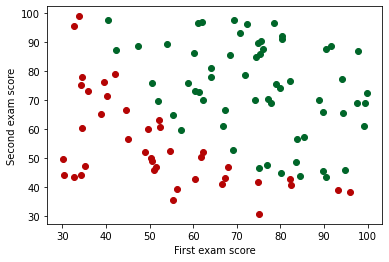

In [2]:
plt.xlabel("First exam score")
plt.ylabel("Second exam score")
plt.scatter(data[data['admitted']==1]['exam_1'],data[data['admitted']==1]['exam_2'] , color = '#006629')
plt.scatter(data[data['admitted']==0]['exam_1'],data[data['admitted']==0]['exam_2'] , color = '#b50404')

# KNN

In [3]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X = data.drop('admitted' , axis = 1)
Y = data['admitted']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.30) 

In [7]:
error_rate = []
for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
    
min_error = error_rate[0]
for i in range(1, len(error_rate)):
    if (error_rate[i] < min_error) & (i!=1):
        min_error = error_rate[i]
        k = i + 1
print("k  : ",k)

k  :  13


Text(0, 0.5, 'Error Rate')

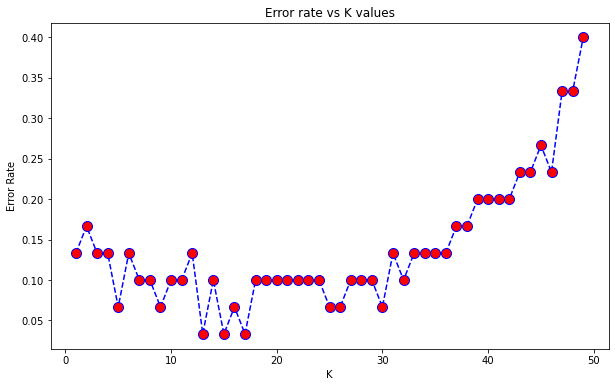

In [8]:
plt.figure(figsize = (10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
pred_k = knn.predict(x_test)

In [10]:
confusion_matrix = confusion_matrix(y_test,pred_k)
confusion_matrix

array([[12,  1],
       [ 0, 17]], dtype=int64)

In [11]:
cm_displayy = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

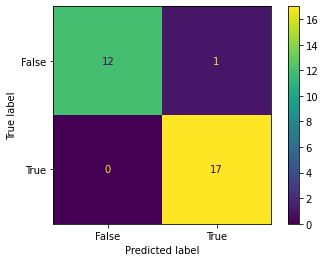

In [12]:
cm_displayy.plot()
plt.show()

# Testing

In [13]:
new_x = 80
new_y = 57
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)


[1]


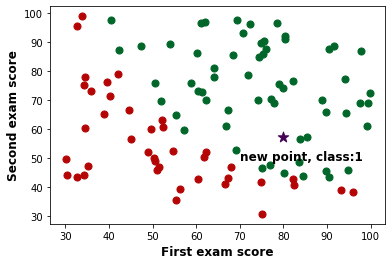

In [14]:
plt.xlabel("First exam score",weight='bold',fontsize = 12)
plt.ylabel("Second exam score",weight='bold',fontsize = 12)
plt.scatter(data[data['admitted']==1]['exam_1'],
            data[data['admitted']==1]['exam_2'],color='#006629',s=50)
plt.scatter(data[data['admitted']==0]['exam_1'],
            data[data['admitted']==0]['exam_2'],color='#b50404',s=50)
plt.scatter(new_x,new_y,c = prediction[0],marker = '*',s=120)
plt.text(x=new_x-10,y=new_y-8,s=f"new point, class:{prediction[0]}",
         weight='bold',fontsize = 12)
plt.show()

In [15]:
print('\n Test performance :')
print('-----------------------------')
print(classification_report(y_test, pred_k))


 Test performance :
-----------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        17

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [16]:
Accuracy = metrics.accuracy_score(y_test, pred_k)
Precision = metrics.precision_score(y_test, pred_k)
Sensitivity_recall = metrics.recall_score(y_test, pred_k)
Specificity = metrics.recall_score(y_test, pred_k, pos_label=0)
F1_score = metrics.f1_score(y_test, pred_k)
#metrics:
print({"Accuracy" :Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


{'Accuracy': 0.9666666666666667, 'Precision': 0.9444444444444444, 'Sensitivity_recall': 1.0, 'Specificity': 0.9230769230769231, 'F1_score': 0.9714285714285714}


# 